<h1> Pandas Module </h1>
<hr>
- Data Structure จัดการกับข้อมูล
- ตัวช่วยในการอ่าน เขียนข้อมูล

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2> Series </h2>

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series

In [3]:
s = pd.Series([1, 2, 3], ['a', 'b', 'c'])

print( s['a'] )
print ( s[1] )
print( s.iloc[1] )
print( s.loc['a'] )

s += 5 # s = s + 5

print(s)
print()
print(s%2==0)
print()
print(s[s%2==0])

1
2
2
1
a    6
b    7
c    8
dtype: int64

a     True
b    False
c     True
dtype: bool

a    6
c    8
dtype: int64


a   -0.279415
b    0.656987
c    0.989358
dtype: float64

count    3.0
mean     7.0
std      1.0
min      6.0
25%      6.5
50%      7.0
75%      7.5
max      8.0
dtype: float64
7.0

a    6
b    7
c    8
dtype: int64
a     7
b    14
c     9
dtype: int64



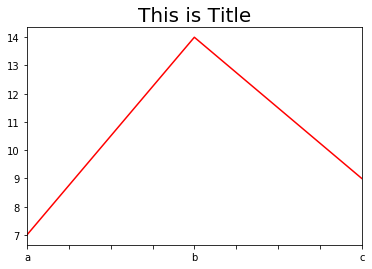

In [5]:
f = lambda x: x**2

def mys(x):
    if x%2 == 0:
        return x + 1
    return x*2

# # s = s.apply(f)
# print( s.apply(f) )
# print ( s.apply(mys) )
# print()
# print( s )
# print()
# print( s.mode() )
print( s.describe() )
x = s.describe()
print (x['mean'] )

print('=========')

d = s.apply(mys)
print()
print(s)
print(d)
print()
ax = d.plot(c='r')
ax.set_title('This is Title', fontsize=20)

In [4]:
print( s.tolist() )
print( s.to_dict() )
print()
print( s.to_csv() )
print()

# Write series to Excel fie
writer =  pd.ExcelWriter('output.xlsx')
s.to_excel(writer)
writer.save()
writer.close()

[6, 7, 8]
{'a': 6, 'b': 7, 'c': 8}

a,6
b,7
c,8




<h1> Data Frame </h1>
<hr>
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [41]:
n = 100

salarys = np.random.choice(np.arange(15000, 70000, 2000), n)
years = np.random.randint(0, 10, n)
df = pd.DataFrame( {'EmployeeID':np.arange(n), 'Salary':salarys, 'Years':years}, )
df.head(5)
# df = pd.DataFrame( {'EmployeeID':np.arange(n), 'Salary':salarys, 'Years':years}, index=np.arange(1, n+1))
# df
# df.iloc[1000]

EmployeeID  Salary  Years
0           0   43000      7
1           1   51000      0
2           2   39000      7
3           3   49000      9
4           4   55000      5

In [6]:
df.columns

Index(['EmployeeID', 'Salary', 'Years'], dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [8]:
df.head(10)

EmployeeID  Salary  Years
0           0   47000      6
1           1   47000      2
2           2   31000      8
3           3   23000      1
4           4   51000      9
5           5   43000      1
6           6   15000      5
7           7   39000      6
8           8   21000      7
9           9   53000      0

In [9]:
df.tail()

EmployeeID  Salary  Years
95          95   59000      3
96          96   55000      5
97          97   43000      4
98          98   27000      9
99          99   31000      1

In [10]:
df.sample(10)

EmployeeID  Salary  Years
20          20   35000      2
82          82   25000      2
88          88   19000      3
87          87   61000      8
57          57   57000      9
90          90   15000      9
8            8   21000      7
11          11   69000      4
66          66   35000      8
59          59   57000      2

In [11]:
df.set_value(0, 'Salary', None)
# df.notnull().all(axis=1)
df[~ df.notnull().all(axis=1)]

EmployeeID  Salary  Years
0           0     NaN      6

In [12]:
tdf = df.copy()
tdf
tdf = tdf.fillna({'Salary': np.random.randint(15000, 20000)})
tdf.head()

EmployeeID   Salary  Years
0           0  16861.0      6
1           1  47000.0      2
2           2  31000.0      8
3           3  23000.0      1
4           4  51000.0      9

In [13]:
tdf = df.dropna().copy()
tdf.head()

EmployeeID   Salary  Years
1           1  47000.0      2
2           2  31000.0      8
3           3  23000.0      1
4           4  51000.0      9
5           5  43000.0      1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FE3371F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022FE3750E10>]], dtype=object)

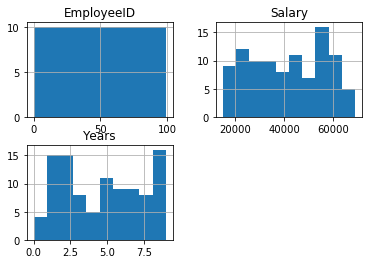

In [14]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FE37489B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022FE3909C18>]], dtype=object)

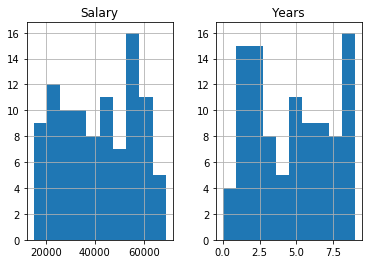

In [15]:
df.loc[:, 'Salary':,].hist()

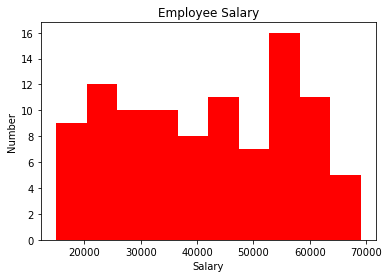

In [16]:
ax = df.Salary.hist(color='r')
ax.set_title('Employee Salary')
ax.set_xlabel('Salary')
ax.set_ylabel('Number')
ax.grid(False)

In [17]:
df[(df.Salary <= 20000) & (df.Years > 4)]

EmployeeID   Salary  Years
6            6  15000.0      5
10          10  17000.0      6
25          25  15000.0      6
46          46  19000.0      7
67          67  15000.0      9
79          79  17000.0      5
90          90  15000.0      9

In [18]:
idx = df[(df.Salary <= 20000) & (df.Years > 4)].index
idx

Int64Index([6, 10, 25, 46, 67, 79, 90], dtype='int64')

In [19]:
df.Salary[idx] = 20000
df

C:\Users\taratep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


EmployeeID   Salary  Years
0            0      NaN      6
1            1  47000.0      2
2            2  31000.0      8
3            3  23000.0      1
4            4  51000.0      9
5            5  43000.0      1
6            6  20000.0      5
7            7  39000.0      6
8            8  21000.0      7
9            9  53000.0      0
10          10  20000.0      6
11          11  69000.0      4
12          12  61000.0      2
13          13  37000.0      9
14          14  23000.0      9
15          15  63000.0      6
16          16  57000.0      1
17          17  43000.0      5
18          18  25000.0      2
19          19  65000.0      5
20          20  35000.0      2
21          21  63000.0      1
22          22  67000.0      9
23          23  15000.0      1
24          24  53000.0      9
25          25  20000.0      6
26          26  53000.0      7
27          27  69000.0      4
28          28  21000.0      9
29          29  33000.0      2
..         ...      ...    ...
70          70  57000.0      2
71          71  43000.0      2
72          72  57000.0      2
73          73  51000.0      6
74          74  29000.0      1
75          75  37000.0      9
76          76  39000.0      8
77          77  47000.0      1
78          78  27000.0      7
79          79  20000.0      5
80          80  23000.0      9
81          81  33000.0      5
82          82  25000.0      2
83          83  53000.0      2
84          84  43000.0      1
85          85  63000.0      7
86          86  63000.0      2
87          87  61000.0      8
88          88  19000.0      3
89          89  65000.0      6
90          90  20000.0      9
91          91  21000.0      7
92          92  39000.0      1
93          93  37000.0      5
94          94  49000.0      9
95          95  59000.0      3
96          96  55000.0      5
97          97  43000.0      4
98          98  27000.0      9
99          99  31000.0      1

[100 rows x 3 columns]

In [20]:
df.loc[idx]

EmployeeID   Salary  Years
6            6  20000.0      5
10          10  20000.0      6
25          25  20000.0      6
46          46  20000.0      7
67          67  20000.0      9
79          79  20000.0      5
90          90  20000.0      9

In [42]:
df['Sales'] = pd.Series(np.random.randint(0, 10, df.shape[0]))
df.head()

EmployeeID  Salary  Years  Sales
0           0   43000      7      9
1           1   51000      0      6
2           2   39000      7      7
3           3   49000      9      3
4           4   55000      5      6

In [22]:
df.mean()

EmployeeID       49.500000
Salary        41616.161616
Years             4.690000
Sales             4.280000
dtype: float64

In [23]:
print ( df.Salary.mean() )
print (df['Salary'].mean() )

41616.16161616162
41616.16161616162


In [24]:
df.Salary.mode()
# from collections import Counter
# print( Counter(df.Salary) )

0    57000.0
dtype: float64

In [25]:
df.Salary.std()

15113.65585421794

In [26]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()


EmployeeID    Salary  Years  Sales
count      100.00     99.00 100.00 100.00
mean        49.50 41,616.16   4.69   4.28
std         29.01 15,113.66   2.97   2.83
min          0.00 15,000.00   0.00   0.00
25%         24.75 29,000.00   2.00   2.00
50%         49.50 43,000.00   5.00   4.00
75%         74.25 56,000.00   7.00   7.00
max         99.00 69,000.00   9.00   9.00

In [27]:
x = pd.isnull(df)
x[x.Salary==True].index

Int64Index([0], dtype='int64')

In [43]:
# df
tdf = df.loc[:, "Salary":,]
tdf.describe()

Salary  Years  Sales
count    100.00 100.00 100.00
mean  44,820.00   4.63   4.60
std   16,342.53   3.00   2.80
min   15,000.00   0.00   0.00
25%   33,000.00   2.00   2.00
50%   47,000.00   4.50   5.00
75%   59,000.00   7.25   7.00
max   69,000.00   9.00   9.00

In [29]:
tdf = df[  ['Salary', 'Years']   ]
tdf.describe()

Salary  Years
count     99.00 100.00
mean  41,616.16   4.69
std   15,113.66   2.97
min   15,000.00   0.00
25%   29,000.00   2.00
50%   43,000.00   5.00
75%   56,000.00   7.00
max   69,000.00   9.00

In [44]:
tdf.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FE5243390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022FE5318550>]], dtype=object)

<h1> Export Data Frame </h1>
<hr>
- Clip Board
- CSV
- Excel
- Database
- etc

(https://pandas.pydata.org/pandas-docs/stable/io.html)

In [45]:
df.head()

EmployeeID  Salary  Years  Sales
0           0   43000      7      9
1           1   51000      0      6
2           2   39000      7      7
3           3   49000      9      3
4           4   55000      5      6

In [46]:
df.to_clipboard()

In [48]:
df.to_csv('test_df.csv', index=False)

In [34]:
df.to_excel('test_df.xlsx')

In [35]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///test_df.db')
with engine.connect() as conn, conn.begin():
    df.to_sql('employee_info', engine, if_exists='replace', index=False)

<h1> Import Data Frame </h1>

In [49]:
df = pd.read_csv('test_df.csv')
df.head()

Unnamed: 0  EmployeeID  Salary  Years  Sales
0           0           0   43000      7      9
1           1           1   51000      0      6
2           2           2   39000      7      7
3           3           3   49000      9      3
4           4           4   55000      5      6

In [50]:
df = pd.read_excel('test_df.xlsx')
df.head()

EmployeeID    Salary  Years  Sales
0           0       nan      6      4
1           1 47,000.00      2      6
2           2 31,000.00      8      7
3           3 23,000.00      1      9
4           4 51,000.00      9      7

In [51]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///test_df.db')
with engine.connect() as conn, conn.begin():
    df = pd.read_sql_table('employee_info', engine)
df.head()

EmployeeID    Salary  Years  Sales
0           0       nan      6      4
1           1 47,000.00      2      6
2           2 31,000.00      8      7
3           3 23,000.00      1      9
4           4 51,000.00      9      7

In [39]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///test_df.db')
with engine.connect() as conn, conn.begin():
    df = pd.read_sql_query('SELECT Salary FROM employee_info WHERE Years > 5', engine)
df.head()

Salary
0       nan
1 31,000.00
2 51,000.00
3 39,000.00
4 21,000.00